In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
import sweetviz as sv
from pandas_profiling import ProfileReport

In [3]:
mp = pd.read_csv('~/Downloads/Metaphlan4_all_pheno_mtx.csv').rename(columns={'Unnamed: 0' : 'External ID'})
mp = mp.set_index('External ID')
mp

,k__Bacteria,p__Bacteroidetes,p__Firmicutes,p__Proteobacteria,c__Bacteroidia,c__Clostridia,c__Betaproteobacteria,c__Deltaproteobacteria,c__Negativicutes,o__Bacteroidales,...,t__SGB14005,t__SGB6358,t__SGB14007,t__SGB6276,t__SGB47307,t__SGB6343,t__SGB4665,t__SGB4924_group,t__SGB6350,t__SGB4921
External ID,,,,,,,,,,,,,,,,,,,,,
PSM7J14T,100.00000,54.45901,42.30283,3.23816,54.45901,42.13480,3.06251,0.17565,0.16803,54.45901,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
CSM79HOL,100.00000,74.30125,19.73015,5.96860,74.30125,18.73846,5.90910,0.05950,0.87724,74.30125,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
CSM67U9D,100.00000,61.96323,33.78890,4.22338,61.96323,30.09409,4.09011,0.13327,3.02112,61.96323,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
HSM7J4N4,100.00000,98.82760,0.08455,1.08784,98.82760,30.09409,4.09011,1.02587,0.08455,98.82760,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
CSM79HJS,100.00000,67.99864,21.24469,10.51531,67.99864,21.18760,6.34576,4.16955,0.08455,67.99864,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HSM7J4R2,100.00000,67.21618,28.10759,4.53335,67.21618,28.10759,3.63017,0.90317,2.24913,67.21618,...,1.03302,5.24979,1.56167,0.02168,0.03508,0.01656,0.02498,0.00194,0.01401,0.00823
MSM79H9A,99.39144,65.91204,24.18585,1.24318,65.91204,21.15077,3.63017,0.90317,2.24913,65.91204,...,1.03302,5.24979,1.56167,0.02168,0.03508,0.01656,0.02498,0.00194,0.01401,0.00823
HSM7J4KK,100.00000,44.55882,47.48655,6.54281,44.47365,47.35033,4.39404,1.54232,0.09869,44.47365,...,1.03302,5.24979,1.56167,0.02168,0.03508,0.01656,0.02498,0.00194,0.01401,0.00823


In [6]:
select_sampels = pd.read_csv('~/Desktop/selected_samples_MTX.csv')
select_sampels = select_sampels.set_index('External ID')
select_sampels.drop("Participant ID", inplace=True, axis=1)

In [51]:
mp = mp.loc[select_sampels.index,:]
mp = mp.loc[:,mp.columns.str.startswith('s__')]
mp["diagnosis"] = select_sampels.iloc[:,-1]
mp

In [45]:
MTX_X = mp.iloc[:,1:583]
MTX_y = select_sampels.iloc[:,-1]

#fill NA's
MTX_X.fillna(MTX_X.median(), inplace=True)
MTX_X = StandardScaler().fit_transform(MTX_X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(MTX_X, MTX_y, test_size=0.30, random_state=0)
# y = label_binarize(y_train, classes=[0, 1, 2])
# n_classes = y.shape[1]

Best Model:
RandomForestClassifier(max_features=2, min_samples_split=5, n_estimators=10,
                       random_state=0)


<AxesSubplot:>

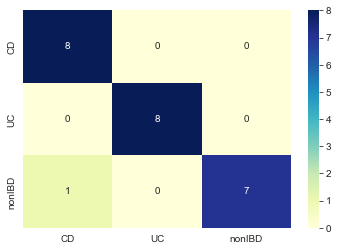

In [50]:
n_estimators_RF = [5, 10, 25, 50, 100]
max_features_RF = [2,4,8,16,32,None]
parameters_RF = {'n_estimators': n_estimators_RF,
                'max_features': max_features_RF}

RF_model = RandomForestClassifier(max_depth=None,
                                  min_samples_split=5, random_state=0)
RF_clf = GridSearchCV(RF_model, parameters_RF, cv=5, scoring= 'accuracy') #completeness_score')

RF_clf.fit(X_train, y_train)

print("Best Model:")
RF_model = RF_clf.best_estimator_
print(RF_model)

RF_predictions = RF_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_RF = confusion_matrix(y_test, RF_predictions,labels=labels)
cm_RF = pd.DataFrame(cm_RF, index=labels, columns=labels)
sns.heatmap(cm_RF, cmap="YlGnBu", annot=True)

In [47]:
from sklearn import metrics
print(f'Accuracy {round(metrics.accuracy_score(y_test, RF_predictions)*100,2)}%')

Accuracy 95.83%
